In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [12, 8]

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Advertising.csv to Advertising.csv


In [4]:
adv = pd.read_csv('Advertising.csv')
adv.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
adv.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


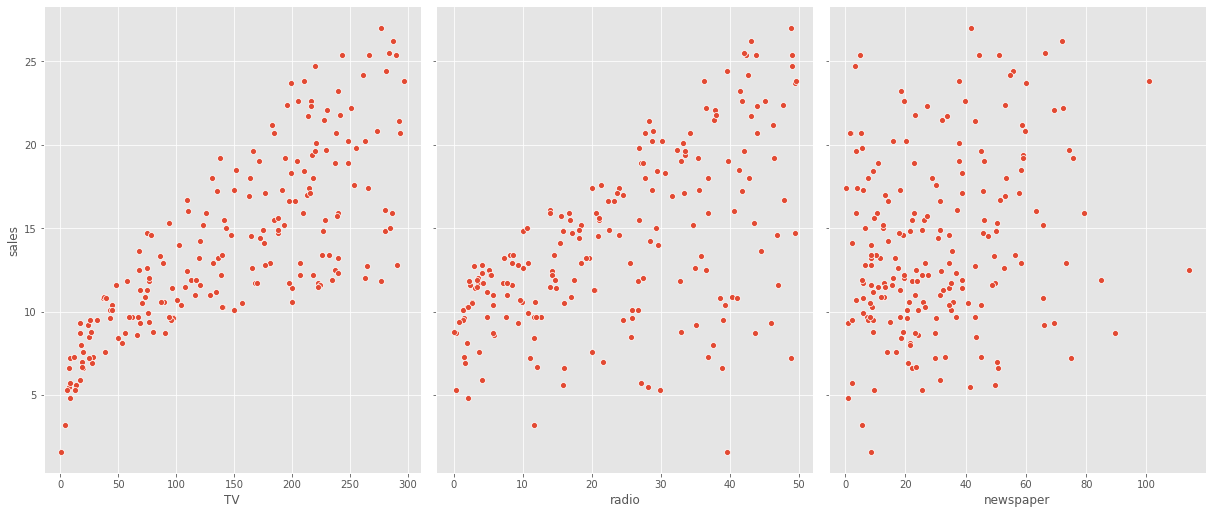

In [8]:
sns.pairplot(adv, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', height=7, aspect=0.8);

In [13]:
from sklearn.linear_model import LinearRegression

X = adv[['TV', 'radio', 'newspaper']]
y = adv.sales

lm1 = LinearRegression()
lm1.fit(X, y)

print(lm1.intercept_)
print(lm1.coef_)



2.938889369459412
[ 0.04576465  0.18853002 -0.00103749]


In [15]:
list(zip(['TV', 'radio', 'newspaper'], lm1.coef_))


[('TV', 0.0457646454553976),
 ('radio', 0.18853001691820448),
 ('newspaper', -0.0010374930424763285)]

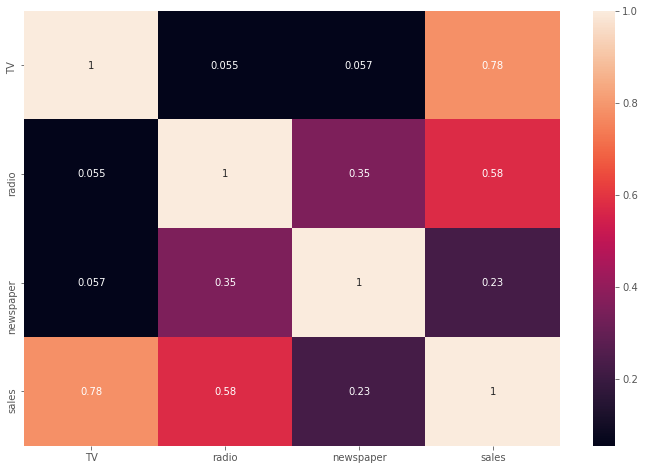

In [16]:
sns.heatmap(adv.corr(), annot=True);

In [17]:
from sklearn.metrics import r2_score

lm2 = LinearRegression().fit(X[['TV', 'radio']], y)
lm2_preds = lm2.predict(X[['TV', 'radio']])

print("R^2: ", r2_score(y, lm2_preds))



R^2:  0.8971942610828957


In [18]:

lm3 = LinearRegression().fit(X[['TV', 'radio', 'newspaper']], y)
lm3_preds = lm3.predict(X[['TV', 'radio', 'newspaper']])


print("R^3: ", r2_score(y, lm3_preds))


R^3:  0.8972106381789522


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = adv[['TV', 'radio', 'newspaper']]
y = adv.sales 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)


lm4 = LinearRegression().fit(X_train, y_train)
lm4_preds = lm4.predict(X_test)

print("RMSE: ", np.sqrt(mean_squared_error(y_test, lm4_preds)))

print("R^2 :", r2_score(y_test, lm4_preds))

RMSE:  1.404651423032895
R^2 : 0.9156213613792232


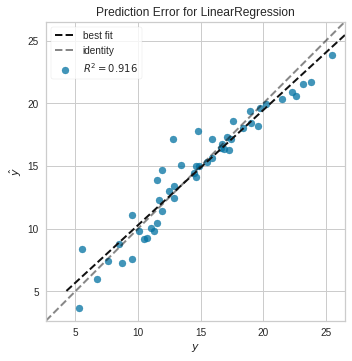

In [24]:
from yellowbrick.regressor import PredictionError, ResidualsPlot

visulaizer = PredictionError(lm4).fit(X_train, y_train)
visulaizer.score(X_test, y_test)
visulaizer.poof();

In [25]:
X = adv[['TV', 'radio', 'newspaper']]
y = adv.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)


lm5 = LinearRegression().fit(X_train, y_train)
lm5_preds = lm5.predict(X_test)

print("RMSE: ", np.sqrt(mean_squared_error(y_test, lm5_preds)))

print("R^2 :", r2_score(y_test, lm5_preds))


RMSE:  1.404651423032895
R^2 : 0.9156213613792232


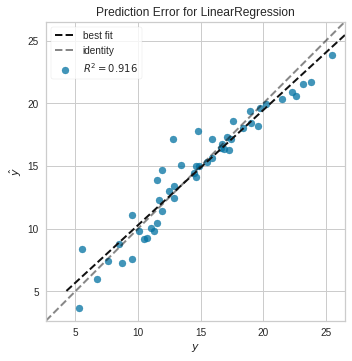

In [26]:
visulaizer = PredictionError(lm5).fit(X_train, y_train)
visulaizer.score(X_test, y_test)
visulaizer.poof();